In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r"C:\Users\91936\Desktop\EDA\Prakhar.csv")
df.drop_duplicates(inplace = True)
df.reset_index(drop = True,inplace = True)
df.shape

(1337, 7)

In [3]:
for j in df.columns:
    for i in df.index:
        if(df.loc[i,j] == 'yes' or df.loc[i,j] == 'male'):
            df.loc[i,j] = 1
        elif(df.loc[i,j] == 'no' or df.loc[i,j] == 'female'):
            df.loc[i,j] = 0
        elif(df.loc[i,j] == 'southwest'):
            df.loc[i,j] = 0
        elif(df.loc[i,j] == 'southeast'):
            df.loc[i,j] = 1
        elif(df.loc[i,j] == 'northwest'):
            df.loc[i,j] = 2
        elif(df.loc[i,j] == 'northeast'):
            df.loc[i,j] = 3

In [4]:
df['smoker'] = pd.to_numeric(df['smoker'])
df['sex'] = pd.to_numeric(df['sex'])
df['region'] = pd.to_numeric(df['region'])

In [5]:
Q1 = np.quantile(df['charges'],0.25)
Q3 = np.quantile(df['charges'],0.75)
IQR = Q3 - Q1

for i in df.index:
    if(df.loc[i,'charges'] >= (Q3 + (IQR*1.5)) or df.loc[i,'charges'] < (Q1 - (IQR*1.5))):
        df.drop(i,axis = 0,inplace = True)
df.reset_index(drop = True, inplace = True)
df.shape

(1198, 7)

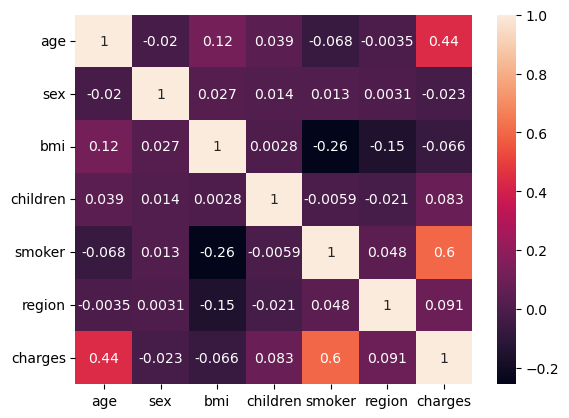

In [6]:
sns.heatmap(df.corr(),annot = True)
plt.show()

In [7]:
df.drop(['sex','bmi','children','region'],axis = 1, inplace = True)

In [8]:
df

,age,smoker,charges
0,19,1,16884.92400
1,18,0,1725.55230
2,28,0,4449.46200
3,33,0,21984.47061
4,32,0,3866.85520
...,...,...,...
1193,50,0,10600.54830
1194,18,0,2205.98080
1195,18,0,1629.83350
1196,21,0,2007.94500


In [9]:
x = df.drop('charges',axis = 1)
y = df['charges']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [11]:
model = LinearRegression()

In [12]:
model.fit(x_train,y_train)

LinearRegression()

In [13]:
predictions = model.predict(x_test)

In [14]:
predictions

array([12302.69281991,  3179.37489544, 12302.69281991, 11562.96433954,
        3672.52721568, 11809.54049967,  3425.95105556, 17800.35910506,
       19033.23990567,  5398.56033653, 11069.8120193 ,  6138.28881689,
        8357.47425798, 12549.26898003, 11069.8120193 ,  9097.20273834,
        9097.20273834,  8110.89809786,  9343.77889846,  5398.56033653,
        8604.0504181 , 13288.99746039,  6384.86497701,  4412.25569604,
        3179.37489544, 22238.72998724, 13782.14978063,  9097.20273834,
       23964.76310808,  3179.37489544,  3179.37489544,  5151.98417641,
        3179.37489544,  3425.95105556,  6878.01729725,  3919.1033758 ,
        3919.1033758 ,  5151.98417641,  4905.40801629,  7617.74577761,
       17553.78294494,  5645.13649665, 28403.13399025,  3919.1033758 ,
       12549.26898003, 23718.18694796,  7371.16961749,  3179.37489544,
       13288.99746039,  7617.74577761, 12795.84514015, 11069.8120193 ,
        4905.40801629, 12056.11665979,  3179.37489544,  6878.01729725,
      

In [15]:
accuracy = r2_score(y_test,predictions)*100
print(accuracy)

63.20477779851792


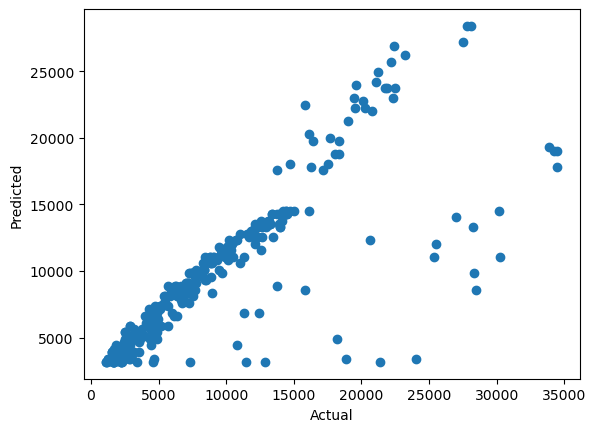

In [16]:
plt.scatter(y_test,predictions);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='charges'>

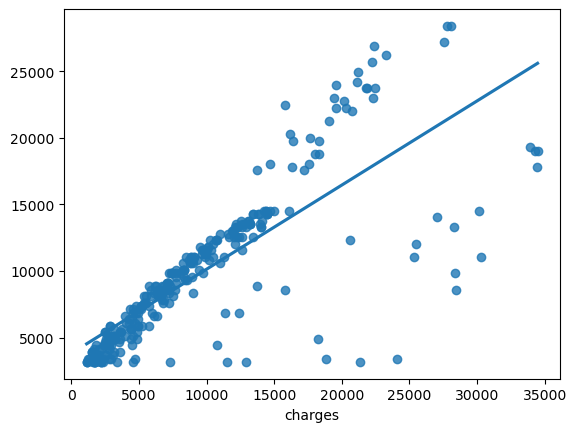

In [17]:
sns.regplot(x = y_test, y = predictions, ci = None)